In [1]:
#To load the Raw data file into Data Frame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


from sklearn import metrics

%matplotlib inline

In [2]:
#Loading dataset
train = pd.read_excel('FinalDataset_train.xlsx') #include all the variables and target variable
test = pd.read_excel('FinalDataSet_test.xlsx') #no target variable

#Checking numerical columns
train_num = train.select_dtypes(include=[np.number])

# select categoric columns
train_cat = train.select_dtypes(exclude=[np.number])

di = {'Failed': 0, 'Success': 1}
train.replace(di, inplace=True)


In [3]:
#We already have a numeric column which contains highest education info.
train = train.drop('Highest education', axis =1)
test = test.drop('Highest education', axis =1)
##Dropping Date column or we can change it to integer
train = train.drop('Last Funding Date', axis =1)
train = train.drop('Est. Founding Date', axis =1)

test = test.drop('Last Funding Date', axis =1)
test = test.drop('Est. Founding Date', axis =1)

In [4]:
X = train.drop(['Dependent-Company Status'],axis=1) #Features
y = train['Dependent-Company Status']   # Target Variables


In [5]:
#Creating dummmy valuues
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train.head(5)

,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Employee Count,Employees count MoM change,Last Funding Amount,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,...,Survival through recession_Not Applicable,Survival through recession_Yes,Gartner hype cycle stage_Peak,Gartner hype cycle stage_Plateau,Gartner hype cycle stage_Slope,Gartner hype cycle stage_Trigger,Gartner hype cycle stage_Trough,Time to maturity of technology (in years)_0 to 2,Time to maturity of technology (in years)_2 to 5,Time to maturity of technology (in years)_5 to 10
0,1,2010,4,1,3.0,0.0,450000,2,0,1,...,1,0,1,0,0,0,0,0,1,0
1,1,2011,3,455,14.0,0.0,2350000,15,0,3,...,1,0,0,0,0,0,1,0,1,0
2,1,2009,5,99,45.0,10.0,10250000,6,0,2,...,1,0,0,0,0,0,1,0,1,0
3,1,2010,4,496,39.0,3.0,5500000,7,0,1,...,1,0,1,0,0,0,0,0,1,0
4,1,2010,4,106,14.0,8.0,1000000,2,0,4,...,1,0,0,0,0,1,0,0,1,0


# Trainig and Testing

In [6]:
#Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Logistic Regression
https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

In [7]:
#Importing model
from sklearn.linear_model import LogisticRegression

In [8]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [9]:
X_train.fillna(X_train.mean(), inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [10]:
#Model fitting according to the given training data 
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
#Predicting the response for test dataset
predictions = logisticRegr.predict(X_test)

# Measuring Model Performance

In [12]:
# Using score method to get accuracy of model
accu_ = logisticRegr.score(X_test, y_test)
#Printing accuracy score
print(accu_)

0.8205128205128205


# Confusion Matrix

In [13]:
cm = metrics.confusion_matrix(y_test, predictions)

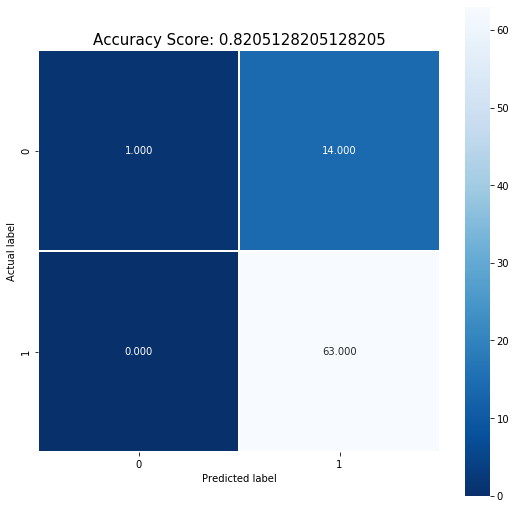

In [14]:
#Plotting the confusion matrix with proper labels
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accu_)
plt.title(all_sample_title, size = 15);

for more studies about the confusion matrix
https://towardsdatascience.com/how-to-evaluate-machine-learning-model-performance-in-python-135b4ae27f7e

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.07      0.12        15
           1       0.82      1.00      0.90        63

    accuracy                           0.82        78
   macro avg       0.91      0.53      0.51        78
weighted avg       0.85      0.82      0.75        78



# Decision Tree

In [16]:
#Importing lib
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier() 

#Fitting the dataset
dtclf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
#Predict the response for test dataset
y_pred1 = dtclf.predict(X_test)

In [18]:
# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

# Using score method to get accuracy of model
accu_ = dtclf.score(X_test, y_test)
#Printing accuracy score
print(accu_)

0.8974358974358975


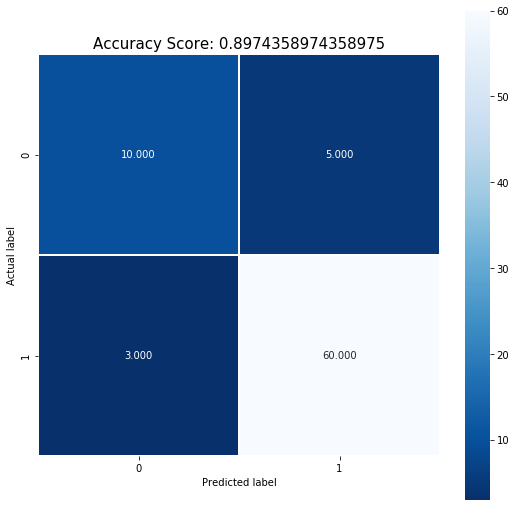

In [19]:
cm = metrics.confusion_matrix(y_test, y_pred1)

#Plotting the confusion matrix with proper labels
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accu_)
plt.title(all_sample_title, size = 15);

In [20]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.92      0.95      0.94        63

    accuracy                           0.90        78
   macro avg       0.85      0.81      0.83        78
weighted avg       0.89      0.90      0.89        78



# Random Forest

In [21]:
#Importing Model
from sklearn.ensemble import RandomForestClassifier
#loading libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Performing predictions on validation dataset
model = RandomForestClassifier(n_estimators=100)
#Fitting
model.fit(X_train, y_train)
#Predicting the response for test dataset
pred_ = model.predict(X_test)

# Evaluate predictions
# Using score method to get accuracy of model
accu_ = model.score(X_test, y_test)
#Printing accuracy score
print(accu_)
print(confusion_matrix(y_test, pred_))
print(classification_report(y_test, pred_))

0.8461538461538461
[[ 6  9]
 [ 3 60]]
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        15
           1       0.87      0.95      0.91        63

    accuracy                           0.85        78
   macro avg       0.77      0.68      0.70        78
weighted avg       0.83      0.85      0.83        78



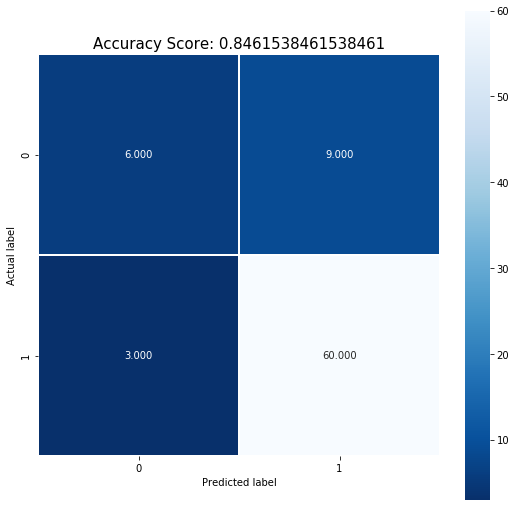

In [22]:
cm = metrics.confusion_matrix(y_test, pred_)

#Plotting the confusion matrix with proper labels
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accu_)
plt.title(all_sample_title, size = 15);

# Xgboost

In [23]:
import xgboost
from xgboost.sklearn import XGBClassifier
import re
#to remove [ or ] or < 
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in train.columns]

In [24]:
xg_reg = XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [25]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [26]:
# Using score method to get accuracy of model
accu_ = model.score(X_test, y_test)
#Printing accuracy score
print(accu_)

0.8461538461538461


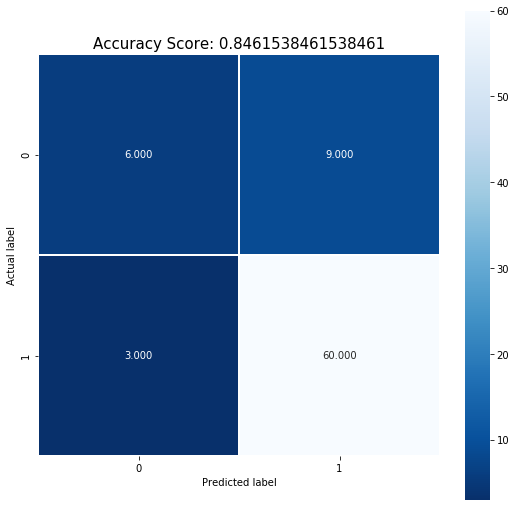

In [27]:
cm = metrics.confusion_matrix(y_test, pred_)

#Plotting the confusion matrix with proper labels
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accu_)
plt.title(all_sample_title, size = 15);

# Logistic Regression 82.05%
# Decision Tree 91.02%
# Random forest 83.33%
# Xgboost 83.3%

# Gradient Boosting Classifier
https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/

# AUC-ROC 

Higher AUC means better model performance at distinguishing b/w positive and negative values

In [28]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# XGgboost
model1 = XGBClassifier()
# Random Forest
model2 = RandomForestClassifier(n_estimators=100)
#Logistic regression
model3 = LogisticRegression()
# Decision Tree
model4 = DecisionTreeClassifier() 
#Gradient boosting
model5 = GradientBoostingClassifier()
#KNN
model6 = KNeighborsClassifier(n_neighbors=1)
# fit both models 
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
pred_prob5 = model5.predict_proba(X_test)
pred_prob6 = model6.predict_proba(X_test)

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [29]:
#https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

#Importing lib
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [30]:
from sklearn.metrics import roc_auc_score

# AUC(Area under the curve) scores
auc_score1 = metrics.roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5, auc_score6)
plt.style.use('seaborn')



0.9248677248677248 0.9291005291005291 0.6867724867724868 0.8603174603174603 0.9333333333333333 0.6984126984126986


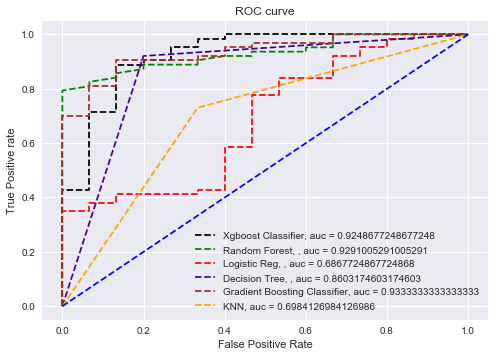

In [31]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#label="data 1, auc="+str(auc)
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='black', label='Xgboost Classifier, auc = '+str(auc_score1))
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest, , auc = '+str(auc_score2))
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Logistic Reg, , auc = '+str(auc_score3))
plt.plot(fpr4, tpr4, linestyle='--',color='indigo', label='Decision Tree, , auc = '+str(auc_score4))
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='Gradient Boosting Classifier, auc = '+str(auc_score5))
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='KNN, auc = '+str(auc_score6))


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();